In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:


df_fake=pd.read_csv("data/Fake.csv")
df_true=pd.read_csv("data/True.csv")


# labeling fake/real news
df_fake["label"]=0
df_true["label"]=1

#combining the datasets, shuffling them randomly, and resetting the index
# to prepare a clean, randomized dataset for training a machine learning model.
df=pd.concat([df_fake,df_true]).sample(frac=1).reset_index(drop=True)




label
0    23481
1    21417
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   word_count  44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB
label
0    23481
1    21417
Name: count, dtype: int64
count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: word_count, dtype: float64


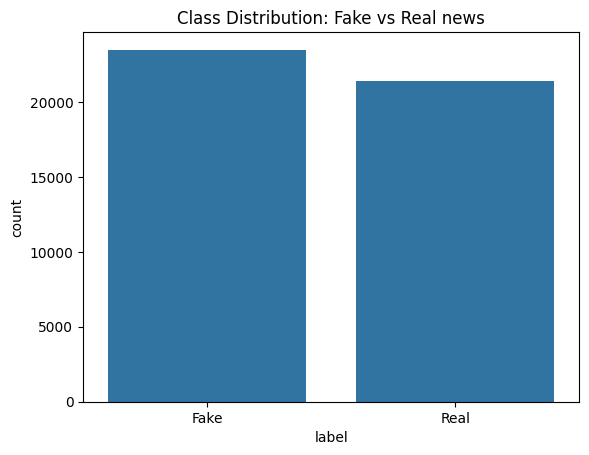

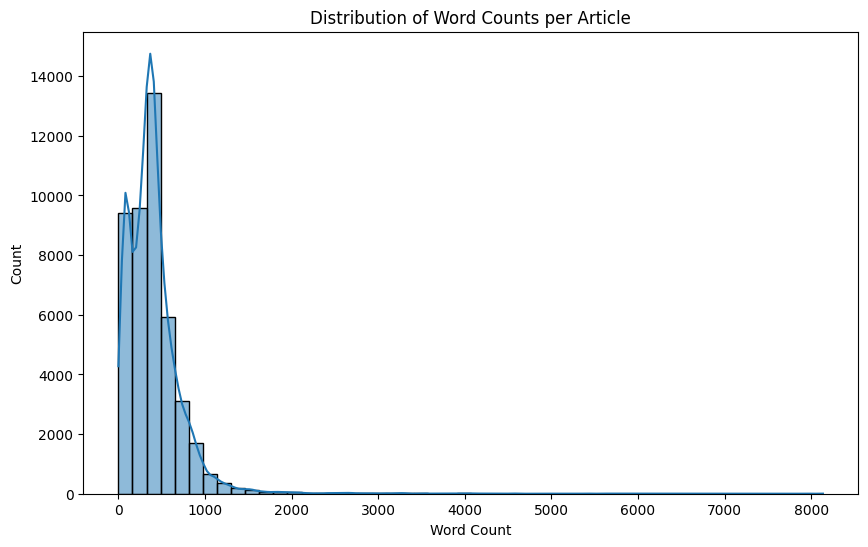

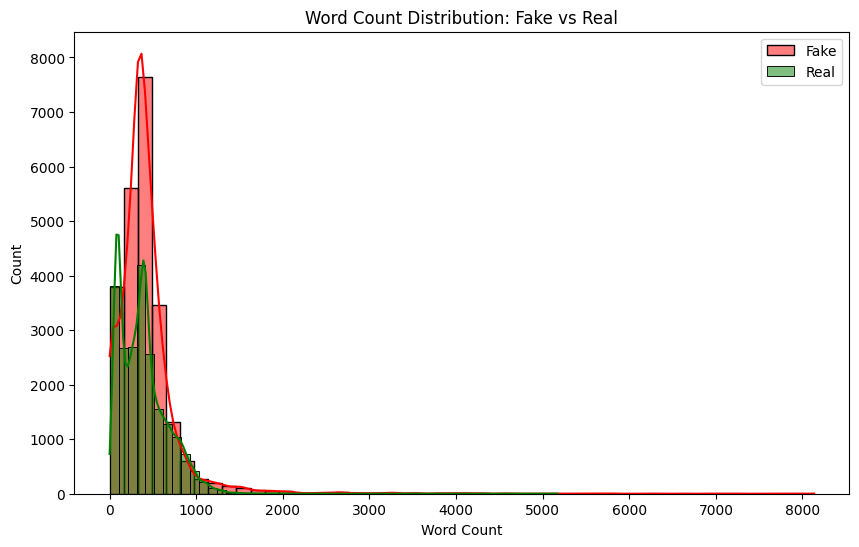

In [21]:
df.info()
df.head()
print(df['label'].value_counts())

df['word_count']=df['text'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())

sns.countplot(x='label',data=df)
plt.xticks([0,1],["Fake","Real"])
plt.title("Class Distribution: Fake vs Real news")

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'],bins=50,kde=True)
plt.title("Distribution of Word Counts per Article")
plt.xlabel("Word Count")


plt.figure(figsize=(10,6))
sns.histplot(df[df['label']==0]['word_count'], color='red', label='Fake', bins=50, kde=True)
sns.histplot(df[df['label']==1]['word_count'], color='green', label='Real', bins=50, kde=True)
plt.title("Word Count Distribution: Fake vs Real")
plt.xlabel("Word Count")
plt.legend()

Text(0.5, 1.0, 'Real News Word Cloud')

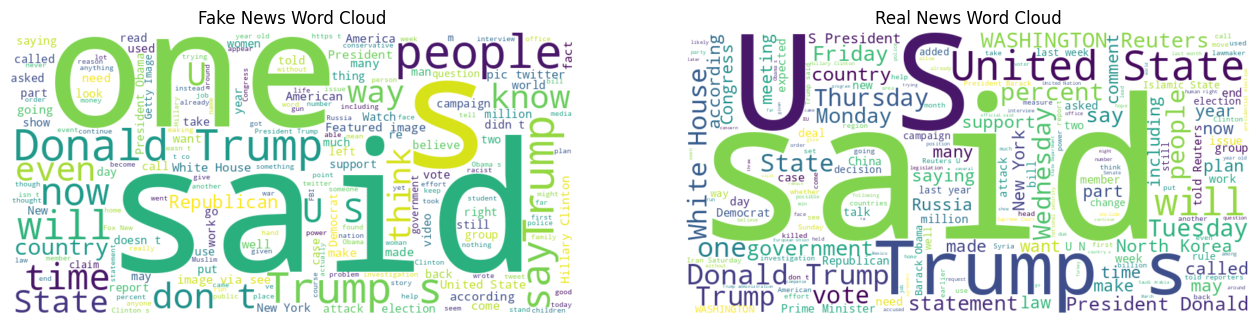

In [24]:
from wordcloud import WordCloud

# Fake news
fake_text = " ".join(df[df['label']==0]['text'].astype(str))
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Real news
real_text = " ".join(df[df['label']==1]['text'].astype(str))
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1,2,2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Word Cloud")
